# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [8]:
temp = []
max_temp = []
humidity = []
wind_speed = []
clouds = []
city_lat = []
city_lon = []
country = []
city_date = []

# Print opening
print("Beginning Data Retrieval")
print("-----------------------------")

# Set up initial values for record and set counts
record_count = 1
set_count = 1

for city in cities:  
    try:
        print(f"Processing Record {record_count} of Set {set_count} | {city.title()}")
        response = requests.get(query_url + city).json()
        
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        city_lat.append(response['coord']['lat'])
        city_lon.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        city_date.append(response['dt'])
        
    except KeyError:
        print(f"City not found. Skipping...")

    record_count += 1
    if record_count == 51:
        record_count = 1
        set_count += 1
        
# Print closing
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Albany
Processing Record 2 of Set 1 | Buon Me Thuot
City not found. Skipping...
Processing Record 3 of Set 1 | Barra Do Garcas
Processing Record 4 of Set 1 | Bluff
Processing Record 5 of Set 1 | Sebinkarahisar
Processing Record 6 of Set 1 | Kegayli
City not found. Skipping...
Processing Record 7 of Set 1 | Gloucester
Processing Record 8 of Set 1 | Hithadhoo
Processing Record 9 of Set 1 | Rikitea
Processing Record 10 of Set 1 | Barrow
Processing Record 11 of Set 1 | Jasper
Processing Record 12 of Set 1 | Tiksi
Processing Record 13 of Set 1 | Najran
Processing Record 14 of Set 1 | Busselton
Processing Record 15 of Set 1 | Cape Town
Processing Record 16 of Set 1 | Poitiers
Processing Record 17 of Set 1 | Vostok
Processing Record 18 of Set 1 | Carnarvon
Processing Record 19 of Set 1 | Pokhara
Processing Record 20 of Set 1 | Grootfontein
Processing Record 21 of Set 1 | Norman Wells
Processing Record 22 of 

Processing Record 38 of Set 4 | Sagay
Processing Record 39 of Set 4 | Longyearbyen
Processing Record 40 of Set 4 | Tieli
Processing Record 41 of Set 4 | Husavik
Processing Record 42 of Set 4 | Leh
Processing Record 43 of Set 4 | Lovington
Processing Record 44 of Set 4 | Quatre Cocos
Processing Record 45 of Set 4 | Chapais
Processing Record 46 of Set 4 | Vao
Processing Record 47 of Set 4 | Mmabatho
Processing Record 48 of Set 4 | Guymon
Processing Record 49 of Set 4 | Oussouye
Processing Record 50 of Set 4 | Saskylakh
Processing Record 1 of Set 5 | Vaini
Processing Record 2 of Set 5 | Ashtabula
Processing Record 3 of Set 5 | Bloemhof
Processing Record 4 of Set 5 | Chuy
Processing Record 5 of Set 5 | Itarema
Processing Record 6 of Set 5 | Acapulco
Processing Record 7 of Set 5 | Taltal
Processing Record 8 of Set 5 | Cambui
Processing Record 9 of Set 5 | Faanui
Processing Record 10 of Set 5 | Te Anau
Processing Record 11 of Set 5 | Lekoni
Processing Record 12 of Set 5 | Karratha
Processing

City not found. Skipping...
Processing Record 31 of Set 8 | Samalaeulu
City not found. Skipping...
Processing Record 32 of Set 8 | Kisangani
Processing Record 33 of Set 8 | Zamora
Processing Record 34 of Set 8 | Tiznit
Processing Record 35 of Set 8 | Broken Hill
Processing Record 36 of Set 8 | Havoysund
Processing Record 37 of Set 8 | Pointe-Noire
Processing Record 38 of Set 8 | Vikhorevka
Processing Record 39 of Set 8 | La Trinitaria
Processing Record 40 of Set 8 | Galgani
City not found. Skipping...
Processing Record 41 of Set 8 | Pevek
Processing Record 42 of Set 8 | Belmonte
Processing Record 43 of Set 8 | Pedro Juan Caballero
Processing Record 44 of Set 8 | Kannur
Processing Record 45 of Set 8 | Somerset East
Processing Record 46 of Set 8 | Parrsboro
Processing Record 47 of Set 8 | Okitipupa
Processing Record 48 of Set 8 | Rancho Palos Verdes
Processing Record 49 of Set 8 | Shetpe
Processing Record 50 of Set 8 | Tandahimba
Processing Record 1 of Set 9 | Wadi Musa
Processing Record

Processing Record 16 of Set 12 | Sergeyevka
Processing Record 17 of Set 12 | Pervomayskoye
Processing Record 18 of Set 12 | Barcelos
Processing Record 19 of Set 12 | Khorixas
Processing Record 20 of Set 12 | Quelimane
Processing Record 21 of Set 12 | Coahuayana
Processing Record 22 of Set 12 | Carbonia
Processing Record 23 of Set 12 | Aden
Processing Record 24 of Set 12 | Mildura
Processing Record 25 of Set 12 | Ilanskiy
Processing Record 26 of Set 12 | Gwadar
Processing Record 27 of Set 12 | Melita
Processing Record 28 of Set 12 | Port Augusta
Processing Record 29 of Set 12 | Griffith
Processing Record 30 of Set 12 | Gayny
Processing Record 31 of Set 12 | Ilulissat
Processing Record 32 of Set 12 | Axim
Processing Record 33 of Set 12 | Tacuarembo
Processing Record 34 of Set 12 | Nata
Processing Record 35 of Set 12 | Caiaponia
Processing Record 36 of Set 12 | Tarko-Sale
Processing Record 37 of Set 12 | Zelenoborskiy
Processing Record 38 of Set 12 | Flinders
Processing Record 39 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
weather = {"City":cities, "City Latitude": city_lat, 
           "City Longitude": city_lon, "Temperature (F)": temp, 
           "Max Temperature (F)": max_temp, "Humidity (%)": humidity,
           "Cloud Coverage (%)": clouds, "Wind Speed (mph)": wind_speed, 
           "City Country": country, "City Datetime": city_date}

In [19]:
weather_df = pd.DataFrame.from_dict(weather, orient='index')
weather_df.transpose().head()

,City,City Latitude,City Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),City Country,City Datetime
0,albany,42.6001,-73.9662,51.89,55.58,88,76,2.51,US,1634819071
1,buon me thuot,-15.89,-52.2567,84.78,84.78,58,0,0,BR,1634819072
2,barra do garcas,-46.6,168.3333,43.41,43.41,81,1,9.24,NZ,1634819073
3,bluff,40.2883,38.4236,56.7,56.7,30,0,2.53,TR,1634819074
4,sebinkarahisar,51.8657,-2.2431,53.53,57.47,61,40,11.5,GB,1634819076


In [20]:
cities_reports = weather_df.transpose().to_csv("cities_reports.csv", encoding="utf-8")
cities_reports

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
import csv
cities_weather = "../starter_code/cities_reports.csv"
cities_weather_df = pd.read_csv(cities_weather)
cities_weather_df

,Unnamed: 0,City,City Latitude,City Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),City Country,City Datetime
0,0,albany,42.6001,-73.9662,51.89,55.58,88.0,76.0,2.51,US,1.634819e+09
1,1,buon me thuot,-15.8900,-52.2567,84.78,84.78,58.0,0.0,0.00,BR,1.634819e+09
2,2,barra do garcas,-46.6000,168.3333,43.41,43.41,81.0,1.0,9.24,NZ,1.634819e+09
3,3,bluff,40.2883,38.4236,56.70,56.70,30.0,0.0,2.53,TR,1.634819e+09
4,4,sebinkarahisar,51.8657,-2.2431,53.53,57.47,61.0,40.0,11.50,GB,1.634819e+09
...,...,...,...,...,...,...,...,...,...,...,...
630,630,hovd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,631,karpathos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,632,yuancheng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,633,los llanos de aridane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#  Get the indices of cities that have humidity over 100%.
city_data = cities_weather_df.dropna()
city_data = city_data.drop(city_data.columns[0], axis = 1)
city_data

,City,City Latitude,City Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),City Country,City Datetime
0,albany,42.6001,-73.9662,51.89,55.58,88.0,76.0,2.51,US,1.634819e+09
1,buon me thuot,-15.8900,-52.2567,84.78,84.78,58.0,0.0,0.00,BR,1.634819e+09
2,barra do garcas,-46.6000,168.3333,43.41,43.41,81.0,1.0,9.24,NZ,1.634819e+09
3,bluff,40.2883,38.4236,56.70,56.70,30.0,0.0,2.53,TR,1.634819e+09
4,sebinkarahisar,51.8657,-2.2431,53.53,57.47,61.0,40.0,11.50,GB,1.634819e+09
...,...,...,...,...,...,...,...,...,...,...
583,nata,48.0056,91.6419,37.26,37.26,42.0,6.0,0.78,MN,1.634820e+09
584,caiaponia,35.5070,27.2132,69.76,69.76,56.0,20.0,20.71,GR,1.634820e+09
585,tarko-sale,36.6520,107.7896,45.18,45.18,40.0,0.0,4.79,CN,1.634820e+09
586,zelenoborskiy,28.6585,-17.9182,73.15,73.15,73.0,11.0,13.80,ES,1.634820e+09


In [23]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
indices = city_data[city_data['Humidity (%)']>100].index
clean_city_data = city_data.drop(indices, inplace=False)
clean_city_data


,City,City Latitude,City Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),City Country,City Datetime
0,albany,42.6001,-73.9662,51.89,55.58,88.0,76.0,2.51,US,1.634819e+09
1,buon me thuot,-15.8900,-52.2567,84.78,84.78,58.0,0.0,0.00,BR,1.634819e+09
2,barra do garcas,-46.6000,168.3333,43.41,43.41,81.0,1.0,9.24,NZ,1.634819e+09
3,bluff,40.2883,38.4236,56.70,56.70,30.0,0.0,2.53,TR,1.634819e+09
4,sebinkarahisar,51.8657,-2.2431,53.53,57.47,61.0,40.0,11.50,GB,1.634819e+09
...,...,...,...,...,...,...,...,...,...,...
583,nata,48.0056,91.6419,37.26,37.26,42.0,6.0,0.78,MN,1.634820e+09
584,caiaponia,35.5070,27.2132,69.76,69.76,56.0,20.0,20.71,GR,1.634820e+09
585,tarko-sale,36.6520,107.7896,45.18,45.18,40.0,0.0,4.79,CN,1.634820e+09
586,zelenoborskiy,28.6585,-17.9182,73.15,73.15,73.0,11.0,13.80,ES,1.634820e+09


In [24]:
city_data_reports = clean_city_data.to_csv("city_data_reports.csv", encoding="utf-8")
city_data_reports


In [25]:
perc = [.25, .50, .75]
include = ['object', 'float', 'int']

describe_city = clean_city_data.drop(columns=['City','Temperature (F)', 'City Country'], axis = 1).describe(percentiles=perc, include=include)
describe_city

,City Latitude,City Longitude,Max Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),City Datetime
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,18.755538,14.057684,62.921838,70.091065,59.109966,7.858179,1.634819e+09
std,33.060427,90.252719,20.319321,21.873292,38.514118,6.241381,1.766589e+02
min,-54.800000,-175.200000,-17.660000,9.000000,0.000000,0.000000,1.634819e+09
25%,-9.038875,-68.589225,50.215000,58.000000,20.000000,3.565000,1.634819e+09
50%,22.157300,21.402150,65.975000,75.000000,75.000000,6.085000,1.634819e+09
75%,44.682975,91.097750,79.875000,87.000000,97.000000,10.817500,1.634820e+09
max,78.218600,178.416700,101.700000,100.000000,100.000000,36.480000,1.634820e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

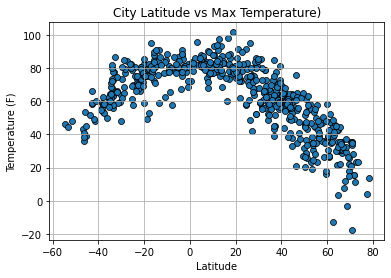

In [40]:
plt.scatter(city_data["City Latitude"], city_data["Max Temperature (F)"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Max Temperature)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("LatvsTemp.png")
plt.show()

In [41]:
## The Latitude vs. Temperature Plot shows a  parabola. As the we get closer to te equater the tempature increases and 
# as we move away the tempature decrease.

## Latitude vs. Humidity Plot

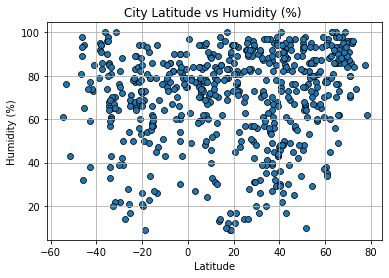

In [27]:
plt.scatter(city_data["City Latitude"], city_data["Humidity (%)"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Humidity (%) ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("LatvsHum.png")
plt.show()

In [ ]:
# The Latitude vs. Humidity Plot shows that humidity is constantly high across the equater. 

## Latitude vs. Cloudiness Plot

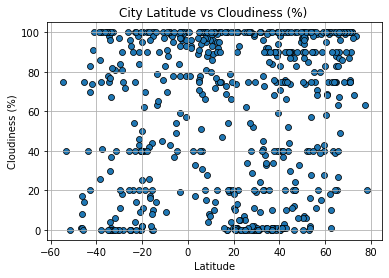

In [42]:
plt.scatter(city_data["City Latitude"], city_data["Cloud Coverage (%)"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Cloudiness (%) ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("LatvsCloud.png")
plt.show()

In [43]:
# the Latitude vs. Cloudiness Plot shows that no matter where you are across the world it will be cloudly

## Latitude vs. Wind Speed Plot

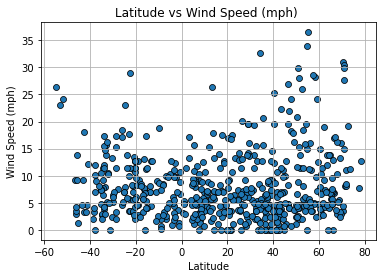

In [45]:

plt.scatter(city_data["City Latitude"], city_data["Wind Speed (mph)"], edgecolor="black", linewidth = .75)
plt.title("Latitude vs Wind Speed (mph) ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("LatvsWind.png")
plt.show()

In [46]:
#Latitude vs. Wind Speed Plot shows that wind speed stays constant as we move along the globe 

## Linear Regression

In [47]:
n_hemp = clean_city_data.loc[clean_city_data["City Latitude"]>0]
n_hemp.head()

,City,City Latitude,City Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),City Country,City Datetime
0,albany,42.6001,-73.9662,51.89,55.58,88.0,76.0,2.51,US,1.634819e+09
3,bluff,40.2883,38.4236,56.70,56.70,30.0,0.0,2.53,TR,1.634819e+09
4,sebinkarahisar,51.8657,-2.2431,53.53,57.47,61.0,40.0,11.50,GB,1.634819e+09
7,hithadhoo,71.2906,-156.7887,28.42,28.42,86.0,90.0,8.05,US,1.634819e+09
8,rikitea,37.2001,-94.3502,43.34,45.36,82.0,1.0,5.75,US,1.634819e+09


In [48]:
s_hemp = clean_city_data.loc[clean_city_data["City Latitude"]<0]
s_hemp.head()

,City,City Latitude,City Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),City Country,City Datetime
1,buon me thuot,-15.8900,-52.2567,84.78,84.78,58.0,0.0,0.00,BR,1.634819e+09
2,barra do garcas,-46.6000,168.3333,43.41,43.41,81.0,1.0,9.24,NZ,1.634819e+09
5,kegayli,-0.6000,73.0833,81.93,81.93,75.0,100.0,10.65,MV,1.634819e+09
6,gloucester,-23.1203,-134.9692,73.62,73.62,77.0,100.0,17.78,PF,1.634819e+09
11,tiksi,-33.6500,115.3333,56.05,56.05,81.0,37.0,7.99,AU,1.634819e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

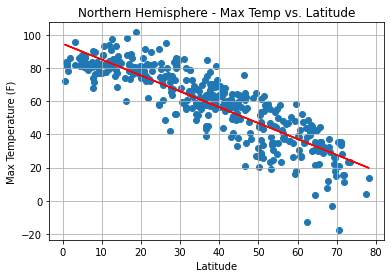

Linear Equation is : y = -0.96 x + 94.82
The r-value is: -0.872902509828519
The p-value is: 4.7593830333164096e-127


In [49]:
n_lat = n_hemp["City Latitude"]
n_max_temp = n_hemp["Max Temperature (F)"]
plt.scatter(n_lat, n_max_temp)
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_max_temp)
regress_values = n_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(n_lat, regress_values,"r-")
plt.grid()
plt.savefig("north_max_tempvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

In [ ]:
#The graph shows as we move more north of the equater the temptature decreases 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

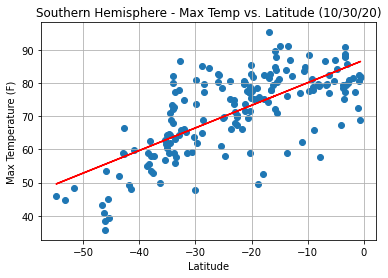

Linear Equation is : y = 0.68 x + 86.92
The r-value is: 0.7135440108582229
The p-value is: 3.7236259438781214e-29


In [50]:
s_lat = s_hemp["City Latitude"]
s_max_temp = s_hemp["Max Temperature (F)"]
plt.scatter(s_lat, s_max_temp)
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Max Temp vs. Latitude (10/30/20)")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_max_temp)
regress_values = s_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(s_lat, regress_values,"r-")
plt.grid()
plt.savefig("south_max_tempvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

In [ ]:
#The graph shows as we move more north of the equater the temptature decreases 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

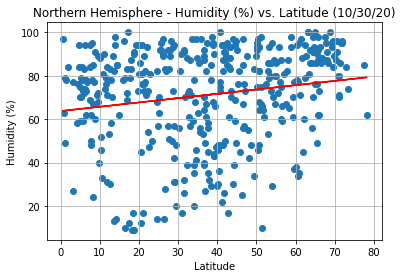

Linear Equation is : y = 0.2 x + 63.71
The r-value is: 0.17707111645220286
The p-value is: 0.00035439908387826147


In [51]:
n_lat = n_hemp["City Latitude"]
n_humidity = n_hemp["Humidity (%)"]
plt.scatter(n_lat, n_humidity)
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude (10/30/20)")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_humidity)
regress_values = n_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(n_lat, regress_values,"r-")
plt.grid()
plt.savefig("north_humidvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

In [52]:
# The humidity increases as the latitude increases 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

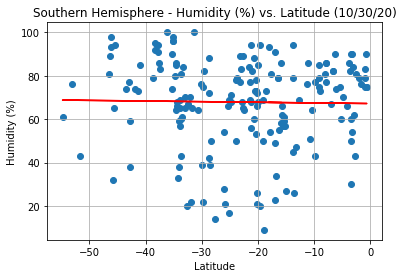

Linear Equation is : y = -0.03 x + 67.18
The r-value is: -0.018394116535941803
The p-value is: 0.8069263950951401


In [53]:
s_lat = s_hemp["City Latitude"]
s_humidity = s_hemp["Humidity (%)"]
plt.scatter(s_lat, s_humidity)
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude (10/30/20)")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_humidity)
regress_values = s_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(s_lat, regress_values,"r-")
plt.grid()
plt.savefig("south_humidvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

In [ ]:
# the humidity seems to stay constant as we move across the equater

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

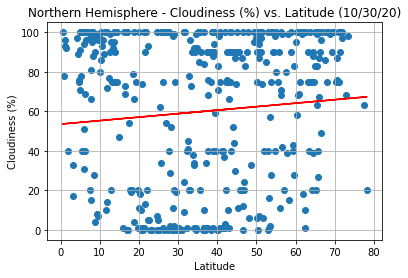

Linear Equation is : y = 0.18 x + 53.53
The r-value is: 0.09143880568756514
The p-value is: 0.06668922808430053


In [54]:
n_lat = n_hemp["City Latitude"]
n_cloud = n_hemp["Cloud Coverage (%)"]
plt.scatter(n_lat, n_cloud)
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude (10/30/20)")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloud)
regress_values = n_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(n_lat, regress_values,"r-")
plt.grid()
plt.savefig("north_cloudvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

In [ ]:
# As the latitude increases cloudiness is constant 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

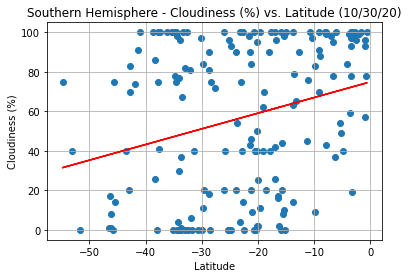

Linear Equation is : y = 0.79 x + 74.89
The r-value is: 0.26738551233704133
The p-value is: 0.00029640631993075646


In [55]:
s_lat = s_hemp["City Latitude"]
s_cloud = s_hemp["Cloud Coverage (%)"]
plt.scatter(s_lat, s_cloud)
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude (10/30/20)")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)
regress_values = s_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(s_lat, regress_values,"r-")
plt.grid()
plt.savefig("south_cloudvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

In [ ]:
# As we move near the equater the cloudiness increases 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

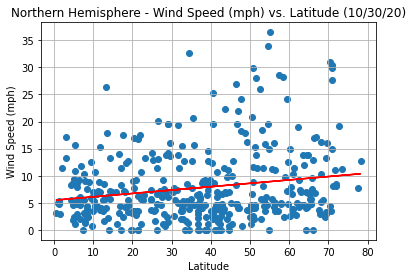

Linear Equation is : y = 0.06 x + 5.48
The r-value is: 0.18756541608363328
The p-value is: 0.0001522814046716192


In [56]:
n_lat = n_hemp["City Latitude"]
n_wind = n_hemp["Wind Speed (mph)"]
plt.scatter(n_lat, n_wind)
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude (10/30/20)")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)
regress_values = n_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(n_lat, regress_values,"r-")
plt.grid()
plt.savefig("north_windvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

In [ ]:
# As we move away from the equater the wind speed picks up

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

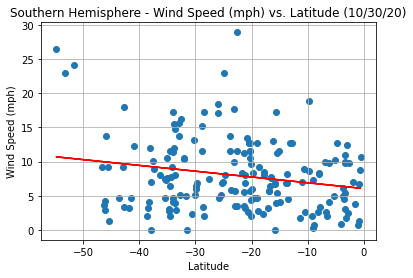

Linear Equation is : y = -0.08 x + 6.06
The r-value is: -0.20968711748158178
The p-value is: 0.004845092536930306


In [57]:
s_lat = s_hemp["City Latitude"]
s_wind = s_hemp["Wind Speed (mph)"]
plt.scatter(s_lat, s_wind)
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude (10/30/20)")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_wind)
regress_values = s_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(s_lat, regress_values,"r-")
plt.grid()
plt.savefig("south_windvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

In [58]:
# As we move closer to the equater the wind speed decreases 